In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


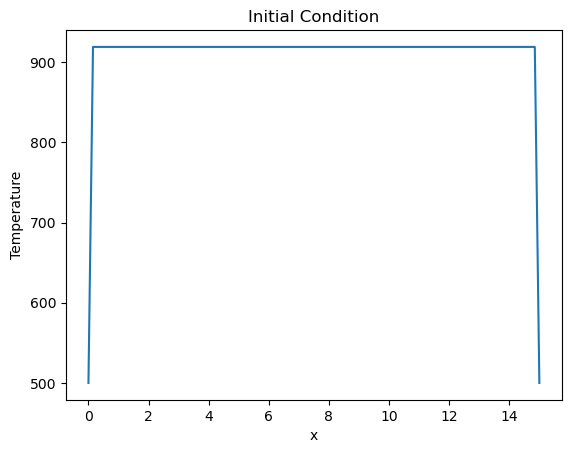

In [3]:
def icfun(x):
    tinit = 919
    tsurr = 500
    if x == 0:
       t = 500
    elif x > 0 and x <0.1:
       t = 500 + (919-500)/0.1*x
    elif x >= 0.1 and x < 14.9:
       t = 919
    elif x >= 14.9 and x < 15:
       t = 919 - (919-500)/0.1*(x-14.9)
    else:
       t = 500
    return t

x = np.linspace(0, 15, 100)
y = [icfun(i) for i in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Initial Condition')
plt.show()

    

3.507078228077629e-05 3.394878564540885e-05 3.686205086349929e-05
The spatial step is 0.0003061224489795918
The time step is 0.0012711033647622566


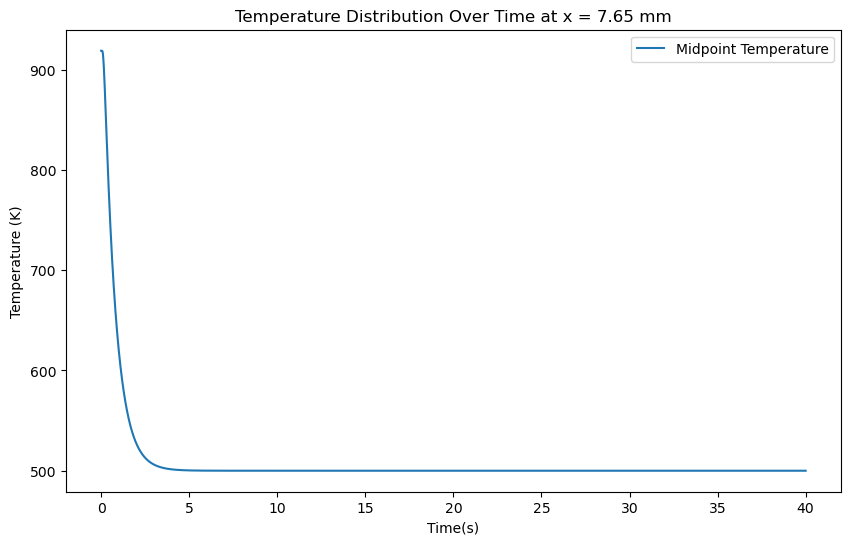

0.0003061224489795918
0.0012711033647622566


In [4]:
from simdata import  fdd, pdeinp, icinp, bcinp,HT_sim ,scaler, invscaler

length = 15e-3
time_end = 40.0
numpoints = 50
temp_init = 919.0
t_surr = 500.0

heat_data = HT_sim(length, time_end, numpoints,  t_surr,temp_init)
alpha = heat_data.alpha_l
tempfield = heat_data.datagen()

heat_data.plot_temp(25)

print(heat_data.dx)
print(heat_data.dt)


In [5]:
from simdata_mush import  fdd, pdeinp, icinp, bcinp,HT_sim ,scaler, invscaler

length = 15e-3
time_end = 40.0
numpoints = 50
temp_init = 919.0
t_surr = 500.0

heat_data = HT_sim(length, time_end, numpoints,  t_surr,temp_init)
alpha = heat_data.alpha_l
tempfield = heat_data.datagen()

heat_data.plot_temp(25)

print(heat_data.dx)
print(heat_data.dt)
print(tempfield.shape)

TypeError: HT_sim.__init__() takes 2 positional arguments but 6 were given

In [18]:


import sympy as sp

# Define time and function
t = sp.Symbol('t')
T = sp.Function('T')(t)

T_s = sp.symbols('T_s')
T_l = sp.symbols('T_l')
k_0 = sp.symbols('k_0')

# Define the equation
g = 1/(k_0 -1)

h = (T_s - T) / (T_s - T_l)

i = 1-h**g
j = h**g
# Define the derivative

dT = sp.diff(i, t)
dTj = sp.diff(j, t)
d_simp = sp.simplify(dT)
print("Derivative of i with respect to t:")
print(dT)
print("Simplified derivative:")
print(d_simp)

print(dTj)

Derivative of i with respect to t:
((T_s - T(t))/(-T_l + T_s))**(1/(k_0 - 1))*Derivative(T(t), t)/((T_s - T(t))*(k_0 - 1))
Simplified derivative:
((-T_s + T(t))/(T_l - T_s))**(1/(k_0 - 1))*Derivative(T(t), t)/((T_s - T(t))*(k_0 - 1))
-((T_s - T(t))/(-T_l + T_s))**(1/(k_0 - 1))*Derivative(T(t), t)/((T_s - T(t))*(k_0 - 1))
